In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir=r"C:\Users\Neeraj\Desktop\Desktop\deeplearning course\final project\Final_Assignment_Face Mask Dataset\Train"
validation_dir=r"C:\Users\Neeraj\Desktop\Desktop\deeplearning course\final project\Final_Assignment_Face Mask Dataset\Validation"
test_dir=r"C:\Users\Neeraj\Desktop\Desktop\deeplearning course\final project\Final_Assignment_Face Mask Dataset\Test"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator=test_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 10000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [5]:
from tensorflow.keras.applications import VGG19
conv_base=VGG19(weights='imagenet',
               include_top=False,
               input_shape=(150,150,3))

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 22,122,049
Trainable params: 22,122,049
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras import optimizers

model.compile(loss="binary_crossentropy",
             optimizer=optimizers.RMSprop(learning_rate=2e-5),
             metrics=['acc']
             )

In [13]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [14]:
history=model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=7,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks=[checkpoint_cb]
)

Epoch 1/7
100/100 [==============================] - 738s 7s/step - loss: 0.2019 - acc: 0.9055 - val_loss: 0.0319 - val_acc: 0.9900
Epoch 2/7
100/100 [==============================] - 744s 7s/step - loss: 0.0701 - acc: 0.9775 - val_loss: 0.0223 - val_acc: 0.9910
Epoch 3/7
100/100 [==============================] - 728s 7s/step - loss: 0.0451 - acc: 0.9850 - val_loss: 0.0265 - val_acc: 0.9920
Epoch 4/7
100/100 [==============================] - 771s 8s/step - loss: 0.0374 - acc: 0.9865 - val_loss: 0.0233 - val_acc: 0.9950
Epoch 5/7
100/100 [==============================] - 758s 8s/step - loss: 0.0397 - acc: 0.9845 - val_loss: 0.0062 - val_acc: 0.9980
Epoch 6/7
100/100 [==============================] - 754s 8s/step - loss: 0.0359 - acc: 0.9895 - val_loss: 0.0056 - val_acc: 0.9970
Epoch 7/7
100/100 [==============================] - 754s 8s/step - loss: 0.0296 - acc: 0.9915 - val_loss: 0.0254 - val_acc: 0.9940


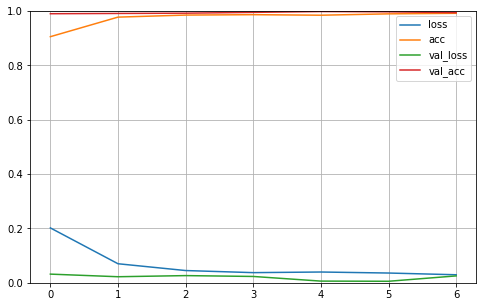

In [15]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()